# A Conceptual and Mathematical Introduction to Neural Networks

CSC/DSC 340 Week 7 Slides (Part 1)

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: September 26, 2023

Last Modified: September 26, 2023

## Review of Material Covered So Far

### The Machine Learning Workflow
    1. Import and clean data; perform initial analysis
        * Same as with other machine learning models
        
    2. Split the data into a training set and test set
         Same as with other machine learning models
         
    3. Train your model
        * A slightly more complicated and lengthy process with neural networks
        
    4. Test your model's performance with the test data
        * Same as with other machine learning models
        
    5. Improve the model through further data refinement or hyperparameter tuning
        * Hyperparameter tuning will be much more complicated with neural networks



### Data Set: Iris Data Set
* Four features with three class labels (clasification problem)

In [2]:
##############################
##          IMPORTS         ##
##############################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
# Load the iris dataset from sklearn
iris = load_iris()

# Convert the iris dataset to a pandas dataframe
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
iris_data['target'] = iris.target

/Users/butlerju/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


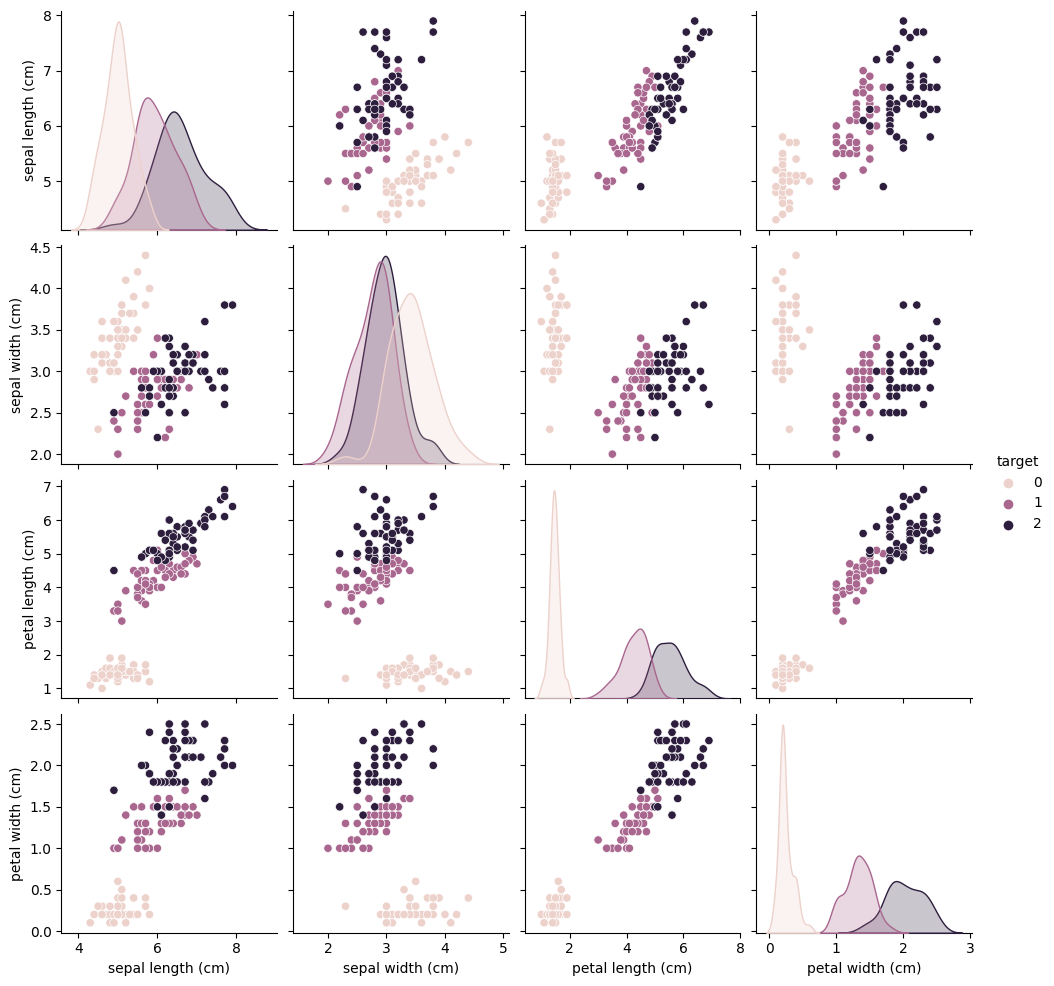

In [4]:
sns.pairplot(iris_data, hue='target')

### Linear Regression
* Output for Linear Regression:
    * $\hat{y} = X\theta$
    * For a four feature data set: $\hat{y} = X_1\theta_1 + X_2\theta_2 + X_3\theta_3 + X_4\theta_4$
    * The output can only be a linear combination of the inputs.
* Loss Function
    * Mean-Squared Error: $J(\theta) = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2$
    * The smaller the value the closer the predictions are to the true results.
* Optimized Weights/Parameters
    * Found by minimizing the loss function with respect to the weights
    * $\theta_{Linear} = (X^TX)^{-1}X^Ty$

### Ridge Regression
* Output for Ridge Regression:
    * $\hat{y} = X\theta$
    * For a four feature data set: $\hat{y} = X_1\theta_1 + X_2\theta_2 + X_3\theta_3 + X_4\theta_4$
    * The output can only be a linear combination of the inputs.
* Loss Function
    * Regularized Mean-Squared Error: $J(\theta) = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha\sum_{i=1}^N|\theta_i|^2$
    * The smaller the value the closer the predictions are to the true results.
    * $\alpha$ is a hyperparameter whose value determines how regularized the algorithm is
* Optimized Weights/Parameters
    * Found by minimizing the loss function with respect to the weights
    * $\theta_{Ridge} = (X^TX-\alpha\textbf{I})^{-1}X^Ty$

### Kernel Ridge Regression
* Output for Kernel Ridge Regression:
    * $\hat{y} = \sum_{i=1}^m \theta_ik(x_i,x)$
    * $x_i$ represents the m training points used to find $\theta$
    * k is the kernel function, adds nonlinearity to the system
    * For a data set with three training points: $\hat{y}(x) = \theta_1k(x_1,x) + \theta_2k(x_2,x) + \theta_3k(x_3,x)$
    * Choice of kernel function is a hyperparameter, each kernel function adds some hyperparameters as well
* Loss Function
    * Regularized Mean-Squared Error: $J(\theta) = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2 + \alpha\sum_{i=1}^N|\theta_i|^2$
    * The smaller the value the closer the predictions are to the true results.
    * $\alpha$ is a hyperparameter whose value determines how regularized the algorithm is
  * Optimized Weights
      * $\theta_{KRR} = (K-\alpha\textbf{I})^{-1}y$
      * K is a kernel matrix
   
All machine learning methods we have investigated so far have closed-form solutions for their weights/parameters.

## Conceptual Neural Network

### Neuron/Node
* Base unit of a neural network; neural networks are made of many connected nodes
* A node is just a function that takes an input, does some math, and produces an output
![Node](Node.png)

### Layers
* Many nodes that all receive the same inputs but are not connected to each other
* The number of nodes in each layer varies and depends on the type of layer
![Layer](Layer.png) 

### Input Layer
* First layer in a neural network
* The number of nodes is the same as the number of features in the data set; each node is passed on of the features
* Does not manipulate its inputs, simply passes them onto the next layer

![Input Layer](Input_Layer.png)

### Output Layer
* The last layer in the neural network, produces the output
* The number of nodes is equal to the number of dimensions of the output; each node outputs one of the dimensions
* Manipulates data using the mathematical formula described later in the notebook

![Output Layer](Output_Layer.png)

### Hidden Layers

* Hidden layers are neural network layers that exist between the input and output layers
* They take an input, manipulate it using the mathematical form discussed later in the notebook, and then pass the results to the next layer in the neural network
* The number of hidden layers and the number of neurons per hidden layer is not controlled by the data set and has to be set by the user
* The hidden layers do not have to have the same number of neurons per layer

![Hidden Layers](Hidden_Layers.png)

### Fully Connected
* Fully connected means that each neuron is connected to every neuron in the next layer
* All networks we will look at in this course are fully connected (but this is not necessary try of all neural network architectures)

### Feedforward
* Feedforward means that data moves only from the input layer in the direction of the output layer, it is never fed backward
* "Regular" neural networks and convolutional neural networks are feed forward, recurrent neural networks are not

### Loss Function
* The loss function determines how accurate the predictions of the neural network are and are used to find the values of the weights
* Unlike the previous machine learning algorithms, the loss function is not set to be the mean-squared error function; it can be any function that determines how well the neural network has performed

![Loss Function](Loss_Function.png)

### Backpropagation
* Backpropagation is the process of optimizing the weights of the neural network to get a better result the next time the neural network is run
* The loss function is used to update the weights of the network (represented in the diagram by the arrows)
* The feedforward-loss function-backpropagation process is one "training iteration", neural networks are trained with hundreds or thousands of training iterations

![Backpropagation](Backpropagation.png)

## Neural Network Mathematics

### Linear Neuron (Weights and Biases)

$$z_i^l = \sum_{j=1}^M w_{ij}^lx_j + b_i^l$$

* X is the input to the neuron
* w is the weights matrix which belongs to the entire layer, each neuron has a specific column of the weights matrix
    * Same function as $\theta$ in previous algorithms
* b is a bias vector that corresponds to the entire layer, each neuron has a specific valye of the bias vector
    * Similar function to fitting the intercept in previous algorithms
* Same for as linear and ridge regression $\longrightarrow$ therefore can only give us linear results
* Applies to neurons in both the hidden layers and in the output layer

### Activation Function
$$z_i^l = f_l(\sum_{j=1}^M w_{ij}^lx_j + b_i^l)$$

* The activation function is applied to the entire output; gives the output some nonlinearity
* Neurons in the same layer will have the same activation function, different layers can have different activation
functions
* A layer does not have to have an activation function (common for output layer)
* Common activation functions:
    * Sigmoid: $f(x) = \frac{1}{1+e^{-x}}$
    * Hyperbolic Tangent: $f(x) = tanh(x)$
    * Rectified Linear Unit (ReLU): $f(x) = max(0,x)$

### Mathematics for First Hidden Layer

If each neuron in the first hidden layer has the form discussed above, then we can write the output of the entire first layer using its activation function, its weight matrix, and its bias vector using the following form. Here, the input to the first hidden layer is the output from the input layer, or simply the input to the neural network (the features).

$$\hat{y}_1 = f_1(W_1\textbf{x} + \textbf{b}_1)$$

### Mathematics for Second Hidden Layer

We can write the output of the second hidden layer in the same way as we wrote the output for the first hidden layer, remembering that its input will be the output from the first hidden layer.

$$\hat{y}_2 = f_2(W_2\hat{y}_1 + \textbf{b}_2)$$

But since we know what the output of the first hidden layer is, we can replace $\hat{y}_1$ with its value in terms of the activation function, the weights matrix, and the bias vector.

$$\hat{y}_2 = f_2(W_2f^1(W_1\textbf(x) + \textbf{b}_1) + \textbf{b}_2)$$

### Mathematics for l-th Hidden Layer (Or Output Layer)

Using the pattern established in the previous two sections to find a general form for the output of the l-th hidden layer. This equation also applies to the output layer as its neurons perform the same manipulations as the neurons in the hidden layer.

$$\hat{y}_l = f_l (W_l \hat{y}_{l-1} + \textbf{b}_l)$$

We can take the above equation and replace $\hat{y}_{l-1}$ with its value in terms of its activation function, weights matrix, and bias vector.

$$\hat{y}_l = f_l(W_lf_{l-1}(W_{l-1}\hat{y}_{l-2} + \textbf{b}_{l-1}) + \textbf{b}_l)$$

We can keep doing this until we reach the equation for the first hidden layer, whose input is the input for the neural network.

$$\hat{y}_l = f_l(W_lf_{l-1}(W_{l-1}(\cdot \cdot \cdot f_1(W_1\textbf{x} + \textbf{b}_1) \cdot \cdot \cdot) + \textbf{b}_{l-1}) + \textbf{b}_l)$$

Thus, assuming that the l-th layer is the output layer of the neural network, we have written an equation that explains how a neural network gets from its input data to its output. Now all that is left to do is determine how it figure out what values of the weight matrices and bias vectors will give the most accurate results.

### Mathematics for Loss Functions

The loss function is what determines how closely the output of the neural network matches the true (or expected results). In the algorithms we have looked at previously, the loss function was always some form of the mean-squared error function, but in neural networks, the loss function can be any function that determines how good the results of the neural network are. Thus, for neural networks, the loss function is an additional hyperparameter that the user has to set.  There are many common loss functions that are used for both regression and classification problems and you can also create custom loss functions.

#### Regression Loss Functions
The most common loss function to use with regression problems is the mean-squared error:
$$J(\theta) = \frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2,$$
but the mean absolute error is also common:
$$J(\theta) = \frac{1}{N}\sum_{i=1}^N|y_i-\hat{y}_i|$$

#### Classification Loss Functions
For classification the loss functions are different, reflecting the probability the neural network got the classification correct. For a binary classification problem, the most common lost function will be the binary cross-entropy which is defined as:

$$ J(\theta) = -\frac{1}{n}\sum_{i=1}^n(y_ilog(p_i)+(1-y_i)log(1-p_i)),$$

where $p_i$ is the probability that the point belongs to the first category.

For multiclass classification, the analogous loss function is the categorical cross-entropy, which is defined as:

$$J(\theta) = -\frac{1}{n}\sum{i=1}^N\sum_{j=1}^M y_{ij}log(p_{ij}),$$

where i is a sum over all points and j is a sum over all categories.

The probability a point belongs to each category can be extracted from most neural network implementations.

### Backpropagation and Optimization
* Backpropagation is the process of using the loss function results to update the weights and biases of the neural network
* Updates the weights/biases of the output layer, then the last hidden layer, and back through the network until the first hidden layer
* Many different optimizers are used here and neural network optimization is a popular research topic in the field of machine learning

#### Choice of Optimizer
* The choice of optimizer becomes a hyperparameter for neural networks
* The simplest optimizer is gradient descent:
$$ \theta_i = \theta_i + l_r\frac{\partial J(\theta)}{\theta_i}$$
* $\theta_i$ is either a weight or bias
* The most common modern optimizer is called Adam and is much more complicated

#### Learning Rate

* A floating point number (usually less than 1) that controls how much the weights and biases will change with each iteration
* Too large and the optimal values may be overshot and too small means there will be very little change between iterations and the training process will be extended
* Analogous to the strength of the regularization ($\alpha$) in ridge regression and kernel ridge regression

## Neural Network Hyperparameters

* Neural networks have an extensive number of hyperparameters that need to be set by the user before the algorithm is run and this makes using neural networks a complicated and time-consuming process.
* Hyperparameter tuning here becomes even more important than in previous algorithms but is also much more time-consuming due to the increased number of parameters and choices for each parameter.

### Loss and Activation Functions
* The choice of loss function and activation functions are both hyperparameters
* Though the loss function is a hyperparameter it is usually not tuned (it can be though)
* The activation function needs to be chosen per hidden layer and for the output layer and does not have to be the same function for the entire network
* No activation function is also an option on a neural network layer and is common for the output layer for regression problems so the output is not constrained by the range of the 

### Architecture (Neurons and Layers)
* The architecture of a neural network refers to the number of hidden layers and the number of neurons per hidden layer
    * Also known as the width and depth of the neural network
* The number of hidden layers and the number of neurons in each hidden layer are hyperparameters
    * The number of neurons in each hidden layer does not have to be the same
* The more hidden layers a network has the more of a chance it has to process the data and extract patterns
* The more neurons in a hidden layer corresponds to a larger weight matrix and more of a chance to create meaningful combinations of the data
* BUT a larger network takes longer to train and eventually adding more layers and neurons can be detrimental to the performance


### Learning Rate and Optimizer
* Both the learning rate and the optimizer are hyperparameters that have to be set before the network is trained
* Here Adam is the most common value for the optimizer but the learning rate could be tuned to increase performance

### Number of Training Iterations
* The number of feedforward-loss function-backpropagation cycles (training iterations) is also a hyperparameter and the number of iterations can lead to losses in the accuracy of the neural network if it's too low or too high (discussed later in this notebook)

### Others
* There are other hyperparameters you can investigate as well including "dropout", "regularization", "early stopping", and others
* You are unlikely to encounter tuning these in this course unless you are curious about using them to improve the performance of your models for the final project

## Other Details

### Overfitting and Underfitting
* Overfitting: the neural network has been trained too many times, has a low training error, but has no ability to generalize to new data and will have a bad test error
* Underfitting: the neural network has not been trained long enough and has not yet picked up the patterns in the data
* It is important to keep an eye on the error of each training iteration as it will likely decrease as the number of iterations increases (reducing the risk of underfitting) but if it becomes too low you run the risk of overfitting the data

### Training Error Versus Test Error
* The error you get during the training process is called the training error and it will always be less than the test error (the error score you receive when feeding the trained neural network the test data set)

### Vanishing Gradient
* A large problem in neural networks is a phenomenon called the vanishing gradient
    * The optimization of the weight and biases can become zero so the weights and biases stop changing between changing iterations
* More of a problem with older optimizers and less of a problem with the modern optimizers

### Inherent Randomness
* Neural networks are inherently built on randomness and thus a single error or accuracy metric should not be reported as the performance of the network
* The weights and biases are initialized randomly each time the neural network is defined, leading to different training results each time
    * There are several different types of initialization schemes that control how the values are initialized but they are not always the best choice depending on the data
* The optimization is not closed form so even with a set initialization scheme the results will still vary